In [23]:
import keras 
import tensorflow as tf
from keras.datasets import mnist #cargo los datos del mnist
import numpy as np
from keras.callbacks import History 
import matplotlib.pyplot as plt
from numpy import genfromtxt
from keras.utils import to_categorical
from sklearn.model_selection import KFold

In [24]:
#ok funciona bien
#funcion que hace reshape de las imagenes
#sin agregar bias alguno
def reshapeImages(x):
    im_shape = x.shape[1:]
    x = np.reshape(x,(x.shape[0],np.prod(im_shape)))
    return x

In [25]:
#cargo imagenes como en la practica anterior
(x_train, y_train), (x_test, y_test) = mnist.load_data()
train_shape = x_train.shape
test_shape = x_test.shape
#hago reshape de las imagenes como habitualmente
x_train = reshapeImages(x_train)
x_test = reshapeImages(x_test)
#con este preprocesado todos los pixeles quedan en el rango [0,1]
x_train = x_train/255.0
x_test = x_test/255.0
#agrego el ruido gaussiano
mean = 0
std = 0.5
x_train_n = x_train + np.random.normal(mean, std, (x_train.shape[0],x_train.shape[1])) #x_train con ruido
x_test_n = x_test + np.random.normal(mean, std, (x_test.shape[0],x_test.shape[1])) #x_test con ruido
#uso la funcion clip para arreglar el rango de nuevo en [0,1]
a_min = 0 
a_max = 1 
x_train_n = np.clip(x_train_n,a_min,a_max) #x_train con ruido
x_test_n = np.clip(x_test_n,a_min,a_max) #x_test con ruido

In [26]:
epocas = 100

In [80]:
def TestNN(x_test,test_shape):
    x_ts = x_test.reshape(test_shape)
    for i in range(10):
        plt.imshow(x_ts[i], cmap = "gray")
        plt.savefig('ej7_red4_after'+str(i)+'.pdf')
        plt.show()

# construyo autoencoder 1 (lo mas simple posible) 

In [6]:
n_dim = x_train.shape[1] #que es = x_test.shape[0]
n_capa1 = 128
x = keras.layers.Input(shape=(n_dim,))
l1 = keras.layers.Dense(n_capa1,activation='relu')(x)
l2 = keras.layers.Dense(n_dim,activation='sigmoid')(l1)
model = keras.Model(inputs=x, outputs=l2)
model.compile(optimizer='adam', loss=keras.losses.MSE)
history = model.fit(x_train_n, x_train, epochs=epocas, validation_data=(x_test_n, x_test),shuffle=True,batch_size=100, verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
 - 2s - loss: 0.0427 - val_loss: 0.0252
Epoch 2/100
 - 1s - loss: 0.0220 - val_loss: 0.0192
Epoch 3/100
 - 2s - loss: 0.0184 - val_loss: 0.0174
Epoch 4/100
 - 1s - loss: 0.0170 - val_loss: 0.0164
Epoch 5/100
 - 1s - loss: 0.0162 - val_loss: 0.0159
Epoch 6/100
 - 1s - loss: 0.0157 - val_loss: 0.0156
Epoch 7/100
 - 2s - loss: 0.0154 - val_loss: 0.0154
Epoch 8/100
 - 2s - loss: 0.0152 - val_loss: 0.0153
Epoch 9/100
 - 2s - loss: 0.0150 - val_loss: 0.0151
Epoch 10/100
 - 2s - loss: 0.0148 - val_loss: 0.0150
Epoch 11/100
 - 2s - loss: 0.0146 - val_loss: 0.0148
Epoch 12/100
 - 2s - loss: 0.0145 - val_loss: 0.0147
Epoch 13/100
 - 2s - loss: 0.0144 - val_loss: 0.0147
Epoch 14/100
 - 2s - loss: 0.0143 - val_loss: 0.0146
Epoch 15/100
 - 2s - loss: 0.0142 - val_loss: 0.0146
Epoch 16/100
 - 2s - loss: 0.0141 - val_loss: 0.0145
Epoch 17/100
 - 2s - loss: 0.0140 - val_loss: 0.0145
Epoch 18/100
 - 2s - loss: 0.0140 - val_loss: 0.0144
Epoch

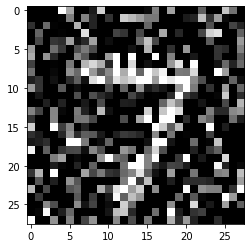

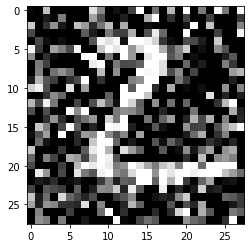

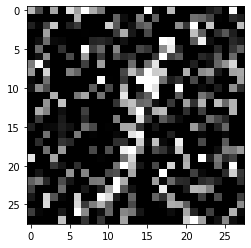

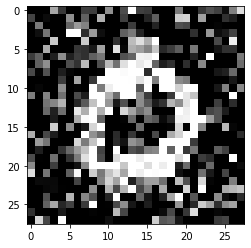

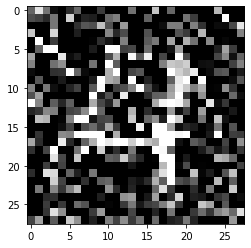

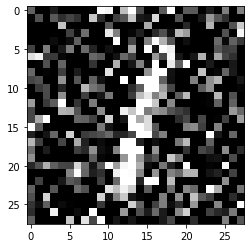

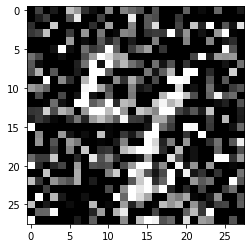

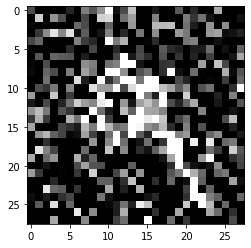

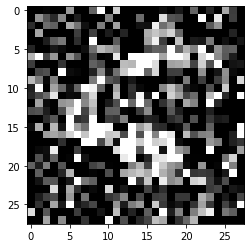

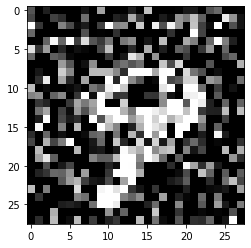

In [7]:
TestNN(x_test_n,test_shape) #imagenes con ruido

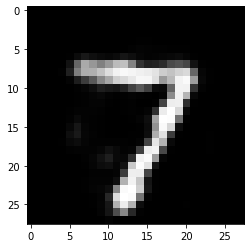

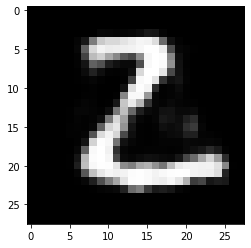

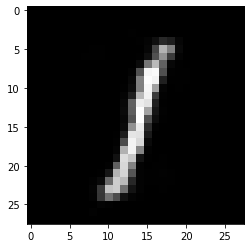

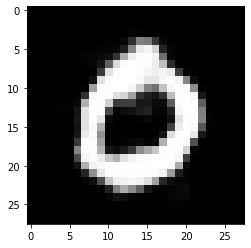

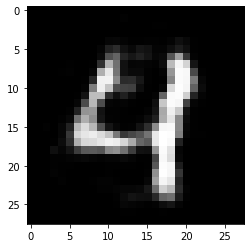

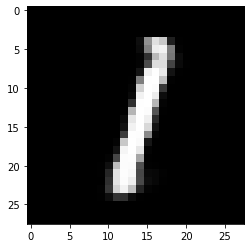

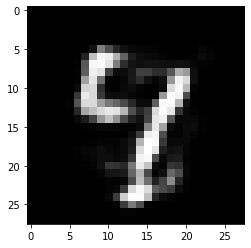

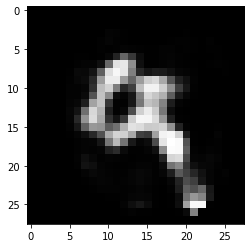

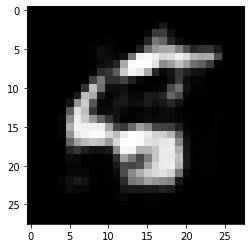

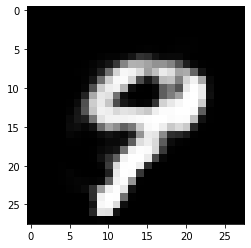

In [10]:
x = model.predict(x_test_n) 
TestNN(x,test_shape) #imagenes despues de la red

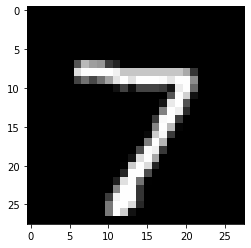

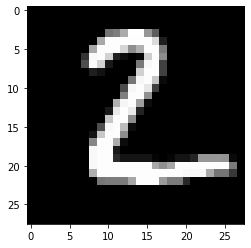

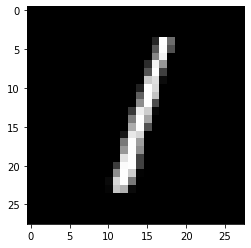

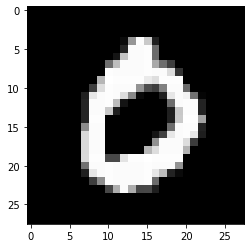

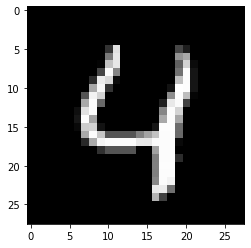

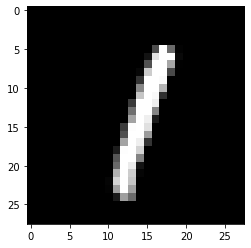

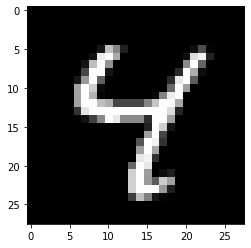

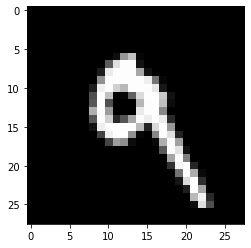

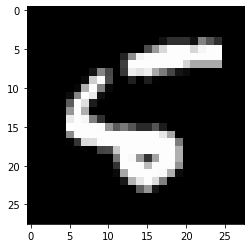

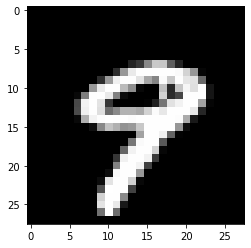

In [13]:
TestNN(x_test,test_shape) #imagenes originales del mnist

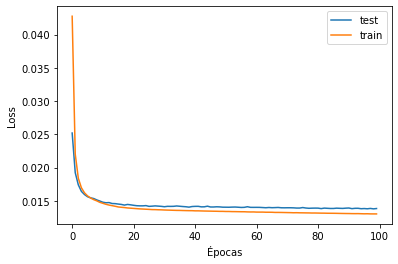

In [8]:
plt.plot(history.history['val_loss'],label='test')
plt.plot(history.history['loss'],label='train')
plt.legend()
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.savefig('ej7_red1_loss.pdf')

# construyo autoencoder 1 (mas capas densas) 

In [7]:
n_dim = x_train.shape[1] #que es = x_test.shape[0]
n_capa1 = 32
n_capa2 = 64
n_capa3 = 128
epocas = 100
x = keras.layers.Input(shape=(n_dim,))
l1 = keras.layers.Dense(n_capa1,activation='relu')(x)
l2 = keras.layers.Dense(n_capa2,activation='relu')(l1)
l3 = keras.layers.Dense(n_capa3,activation='relu')(l2)
l4 = keras.layers.Dense(n_dim,activation='sigmoid')(l3)
model = keras.Model(inputs=x, outputs=l4)
model.compile(optimizer='adam', loss=keras.losses.MSE)
history = model.fit(x_train_n, x_train, epochs=epocas, validation_data=(x_test_n, x_test),shuffle=True,batch_size=100, verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
 - 3s - loss: 0.0511 - val_loss: 0.0342
Epoch 2/100
 - 2s - loss: 0.0313 - val_loss: 0.0283
Epoch 3/100


KeyboardInterrupt: 

In [16]:
#imagenes con ruido son las mismas que las anteriores red
#y las reales obviamente que tambien, solo grafico las de despues de la red

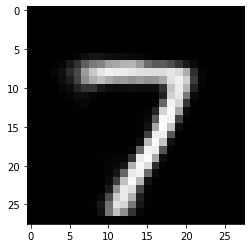

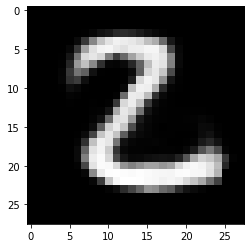

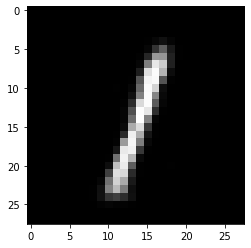

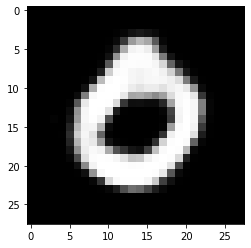

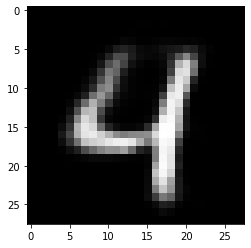

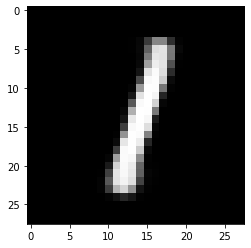

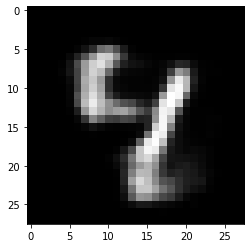

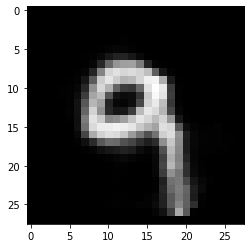

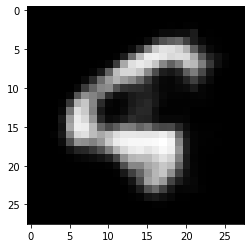

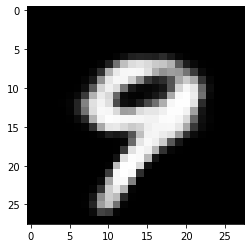

In [84]:
x = model.predict(x_test_n) 
TestNN(x,test_shape) #imagenes despues de la red

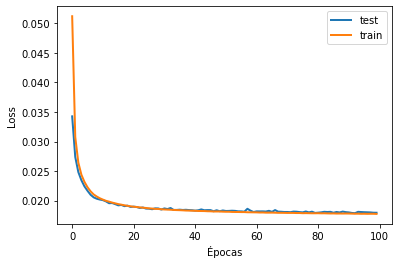

In [86]:
plt.plot(history.history['val_loss'],label='test',linewidth=2)
plt.plot(history.history['loss'],label='train',linewidth=2)
plt.legend()
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.savefig('ej7_red2_loss.pdf')

# construyo autoencoder 2 (2 capas convolucionales) 

In [68]:
x_train = x_train.reshape(train_shape)
x_train_n = x_train_n.reshape(train_shape)
x_test = x_test.reshape(test_shape)
x_test_n = x_test_n.reshape(test_shape)
x_train = x_train[...,tf.newaxis]
x_train_n = x_train_n[...,tf.newaxis]
x_test = x_test[...,tf.newaxis]
x_test_n = x_test_n[...,tf.newaxis]
epocas = 100
model = keras.Sequential()
model.add(keras.layers.Conv2D(16,(3, 3), activation='relu', padding='same',input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D(pool_size = (2, 2), padding='same'))
model.add(keras.layers.Conv2D(16, (3, 3), activation='relu',padding='same'))
model.add(keras.layers.UpSampling2D((2, 2)))
model.add(keras.layers.Conv2D(1, (2, 2), activation='sigmoid', padding='same'))
model.compile(optimizer='adam', loss=keras.losses.MSE)
history = model.fit(x_train_n, x_train, epochs=epocas, validation_data=(x_test_n, x_test),shuffle=True,batch_size=100, verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
 - 3s - loss: 0.0387 - val_loss: 0.0165
Epoch 2/100
 - 3s - loss: 0.0159 - val_loss: 0.0152
Epoch 3/100
 - 3s - loss: 0.0151 - val_loss: 0.0147
Epoch 4/100
 - 3s - loss: 0.0147 - val_loss: 0.0144
Epoch 5/100
 - 3s - loss: 0.0144 - val_loss: 0.0141
Epoch 6/100
 - 3s - loss: 0.0141 - val_loss: 0.0138
Epoch 7/100
 - 3s - loss: 0.0138 - val_loss: 0.0135
Epoch 8/100
 - 3s - loss: 0.0135 - val_loss: 0.0133
Epoch 9/100
 - 3s - loss: 0.0133 - val_loss: 0.0131
Epoch 10/100
 - 3s - loss: 0.0132 - val_loss: 0.0130
Epoch 11/100
 - 3s - loss: 0.0131 - val_loss: 0.0129
Epoch 12/100
 - 3s - loss: 0.0130 - val_loss: 0.0129
Epoch 13/100
 - 3s - loss: 0.0129 - val_loss: 0.0128
Epoch 14/100
 - 3s - loss: 0.0129 - val_loss: 0.0128
Epoch 15/100
 - 3s - loss: 0.0129 - val_loss: 0.0128
Epoch 16/100
 - 3s - loss: 0.0128 - val_loss: 0.0128
Epoch 17/100
 - 3s - loss: 0.0128 - val_loss: 0.0127
Epoch 18/100
 - 3s - loss: 0.0128 - val_loss: 0.0126
Epoch

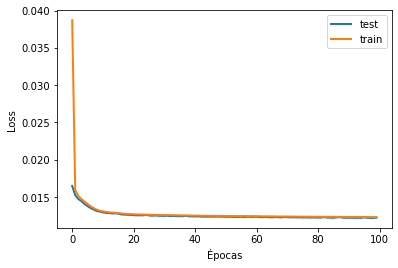

In [71]:
plt.plot(history.history['val_loss'],label='test',linewidth=2)
plt.plot(history.history['loss'],label='train',linewidth=2)
plt.legend()
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.savefig('ej7_red3_loss.pdf')

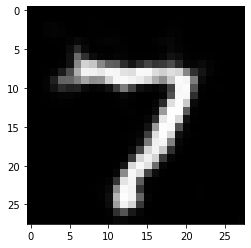

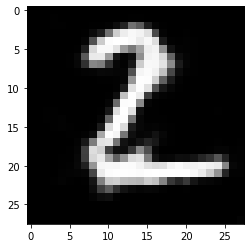

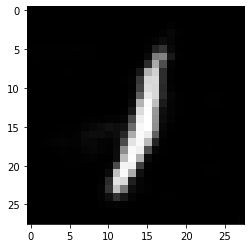

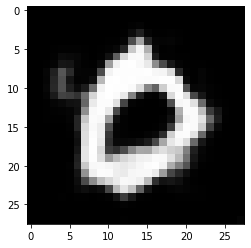

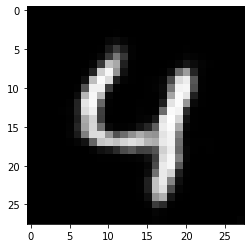

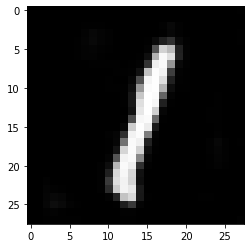

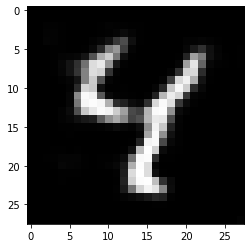

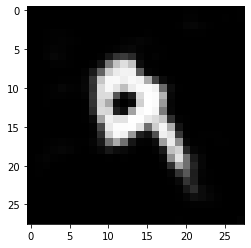

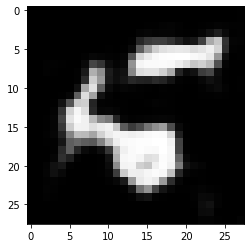

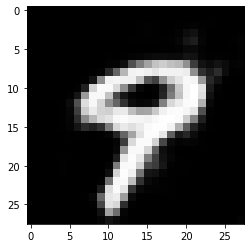

In [72]:
x = model.predict(x_test_n) 
TestNN(x,test_shape) #imagenes despues de la red

# construyo ultimo autoencoder convolucional (con una o dos capas mas)

In [148]:
# construyo ultimo autoencoder convolucional (con una o dos capas mas seria la idea a ver si mejora un poco la performance)
# voy probando a ver que onda
model = keras.Sequential()
sz = 3
model.add(keras.layers.Conv2D(8,(sz, sz), activation='relu', padding='same',input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D((2, 2), padding='same'))
model.add(keras.layers.Conv2D(8, (sz, sz), activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D((2, 2), padding='same'))
model.add(keras.layers.Conv2D(4, (sz, sz), activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D((2, 2), padding='same'))
model.add(keras.layers.Conv2D(8, (sz, sz), activation='relu',padding='same'))
model.add(keras.layers.UpSampling2D((2, 2)))
model.add(keras.layers.Conv2D(8, (sz, sz), activation='relu',padding='same'))
model.add(keras.layers.UpSampling2D((2, 2)))
model.add(keras.layers.Conv2D(4, (sz, sz), activation='relu'))
model.add(keras.layers.UpSampling2D((2, 2)))
model.add(keras.layers.Conv2D(1, (sz, sz), activation='sigmoid', padding='same'))
optimizer = keras.optimizers.SGD(learning_rate=1)
model.compile(optimizer, loss=keras.losses.MSE)
history = model.fit(x_train_n, x_train, epochs=epocas, validation_data=(x_test_n, x_test),shuffle=True,batch_size=100, verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
 - 3s - loss: 0.0569 - val_loss: 0.0461
Epoch 2/100
 - 3s - loss: 0.0410 - val_loss: 0.0395
Epoch 3/100
 - 3s - loss: 0.0366 - val_loss: 0.0355
Epoch 4/100
 - 3s - loss: 0.0347 - val_loss: 0.0334
Epoch 5/100
 - 3s - loss: 0.0334 - val_loss: 0.0319
Epoch 6/100
 - 3s - loss: 0.0325 - val_loss: 0.0317
Epoch 7/100
 - 3s - loss: 0.0318 - val_loss: 0.0329
Epoch 8/100
 - 3s - loss: 0.0312 - val_loss: 0.0311
Epoch 9/100
 - 3s - loss: 0.0308 - val_loss: 0.0295
Epoch 10/100
 - 3s - loss: 0.0304 - val_loss: 0.0290
Epoch 11/100
 - 3s - loss: 0.0301 - val_loss: 0.0301
Epoch 12/100
 - 3s - loss: 0.0298 - val_loss: 0.0287
Epoch 13/100


KeyboardInterrupt: 

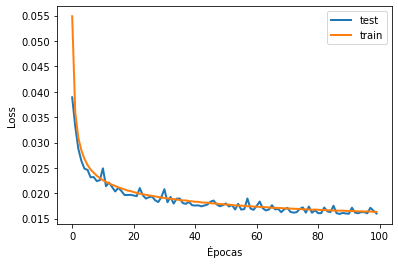

In [146]:
plt.plot(history.history['val_loss'],label='test',linewidth=2)
plt.plot(history.history['loss'],label='train',linewidth=2)
plt.legend()
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.savefig('ej7_red4_loss.pdf')

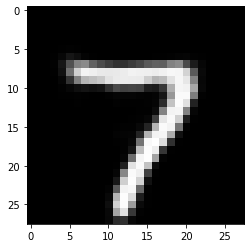

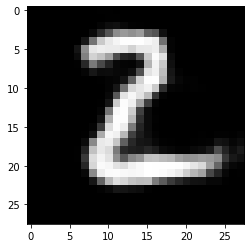

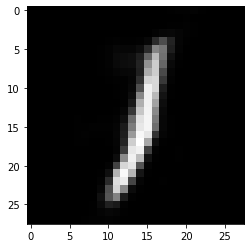

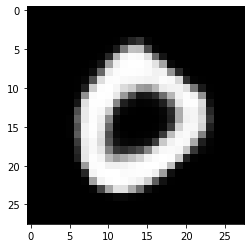

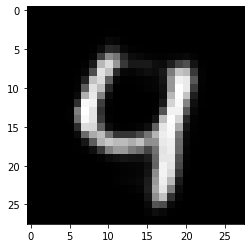

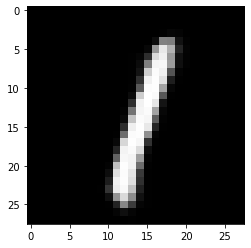

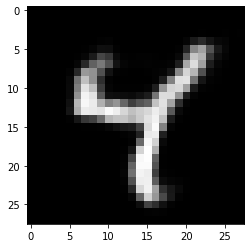

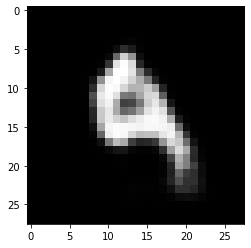

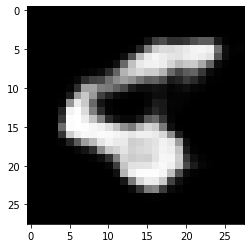

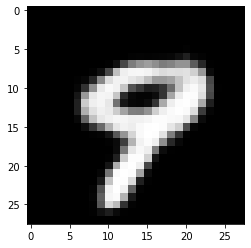

In [147]:
x = model.predict(x_test_n) 
TestNN(x,test_shape) #imagenes despues de la red